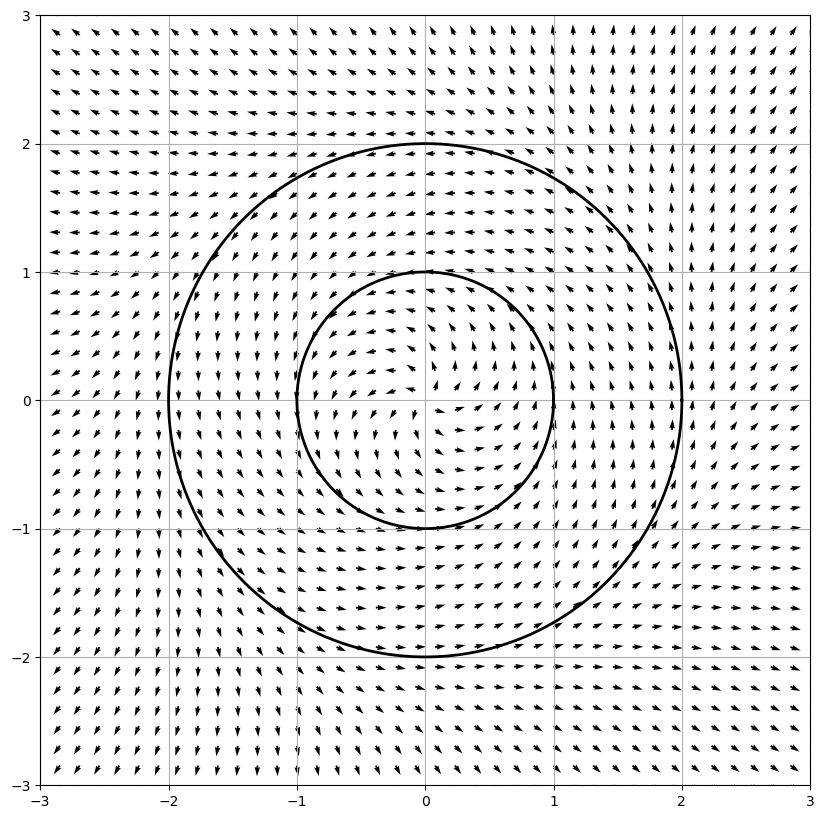

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
omega = 1  # Angular velocity

# Define the system in polar coordinates
def r_dot(r):
    return r * (r - 1) * (r - 2)
    
def theta_dot():
    return omega

# Create a grid for x and y
x = np.linspace(-3, 3, 40)
y = np.linspace(-3, 3, 40)
X, Y = np.meshgrid(x, y)

# Convert Cartesian coordinates to polar coordinates
R = np.sqrt(X**2 + Y**2)
Theta = np.arctan2(Y, X)

# Compute the derivatives in polar coordinates
R_dot = r_dot(R)
Theta_dot = theta_dot()

# Convert the polar derivatives to Cartesian derivatives
U = R_dot * np.cos(Theta) - R * Theta_dot * np.sin(Theta)
V = R_dot * np.sin(Theta) + R * Theta_dot * np.cos(Theta)

# Normalize the vector field
magnitude = np.sqrt(U**2 + V**2)
U_normalized = U / magnitude
V_normalized = V / magnitude

# Plot the normalized vector field
plt.figure(figsize=(10, 10))
plt.quiver(X, Y, U_normalized, V_normalized, color='k', angles='xy')

# Plot the limit cycles
# r = 1 and r = sqrt(2) are the radii for limit cycles
theta_cycle = np.linspace(0, 2 * np.pi, 400)
r1 = 1
r2 = 2
x1 = r1 * np.cos(theta_cycle)
y1 = r1 * np.sin(theta_cycle)
x2 = r2 * np.cos(theta_cycle)
y2 = r2 * np.sin(theta_cycle)

plt.plot(x1, y1, 'k', linewidth=2)
plt.plot(x2, y2, 'k', linewidth=2)

# Plot settings
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Show plot
plt.savefig('ex6.1.1.png')

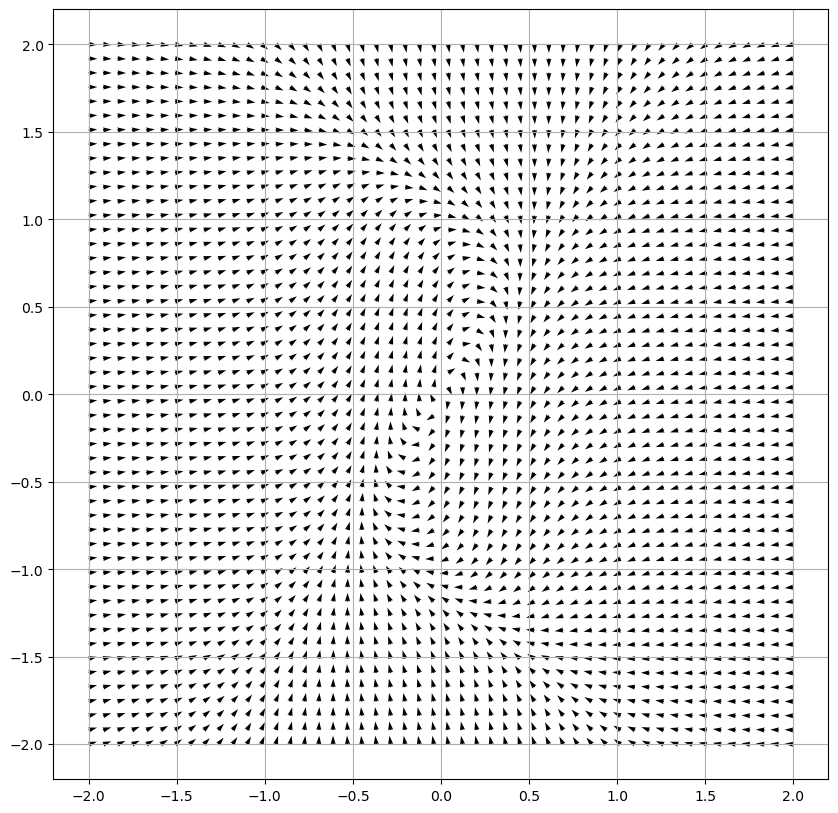

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dynamical system equations
def dynamical_system(x, y, normalize=True):
    dxdt = y - 8 * x**3
    dydt = 2 * y - 4 * x - 2 * y**3
    norm = 1
    if normalize:
        norm = dxdt**2 + dydt**2
        norm = np.sqrt(norm)
    return dxdt/norm, dydt/norm

# Generate grid for vector field
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
DX, DY = dynamical_system(X, Y)

# Plot the vector field
plt.figure(figsize=(10, 10))
plt.quiver(X, Y, DX, DY, color='black')
plt.grid(True)
plt.savefig('ex6.1.3.png')

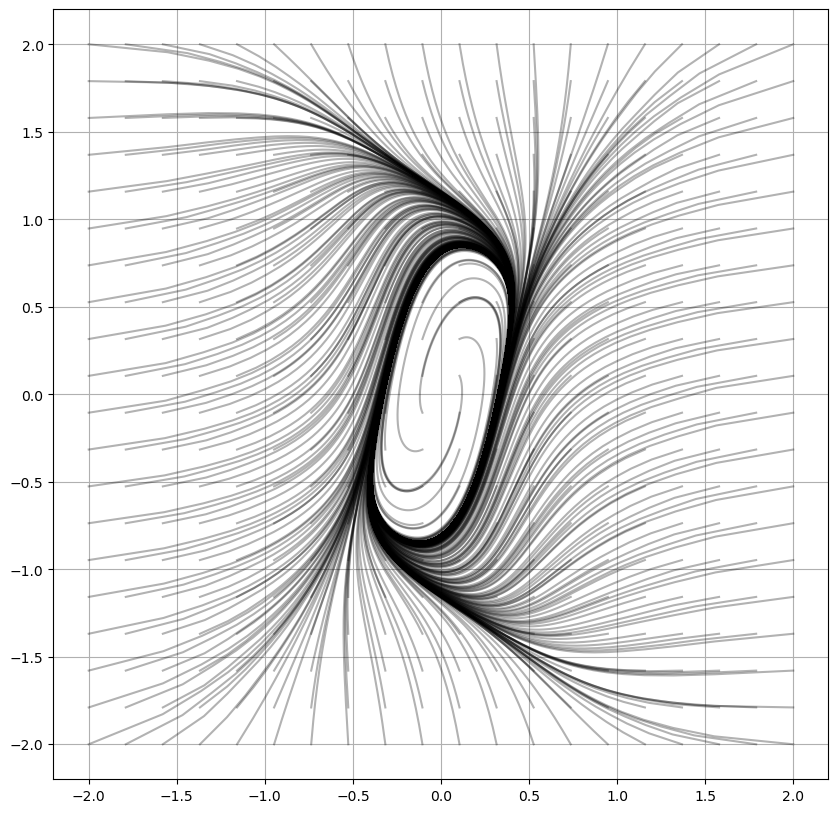

In [38]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the dynamical system equations
def dynamical_system(t, z):
    x, y = z
    dxdt = y - 8 * x**3
    dydt = 2 * y - 4 * x - 2 * y**3
    return [dxdt, dydt]

# Set up grid of initial conditions
x_values = np.linspace(-2, 2, 20)
y_values = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_values, y_values)
initial_conditions = np.vstack((X.flatten(), Y.flatten())).T

# Solve the system of differential equations for each initial condition
solutions = []
for initial_condition in initial_conditions:
    sol = solve_ivp(dynamical_system, [0, 10], initial_condition, t_eval=np.linspace(0, 10, 1000))
    solutions.append(sol.y)

# Plot the phase portrait
plt.figure(figsize=(10, 10))
for sol in solutions:
    plt.plot(sol[0], sol[1], color='k', alpha=0.3)
plt.grid(True)
plt.savefig('ex6.1.3_1.png')

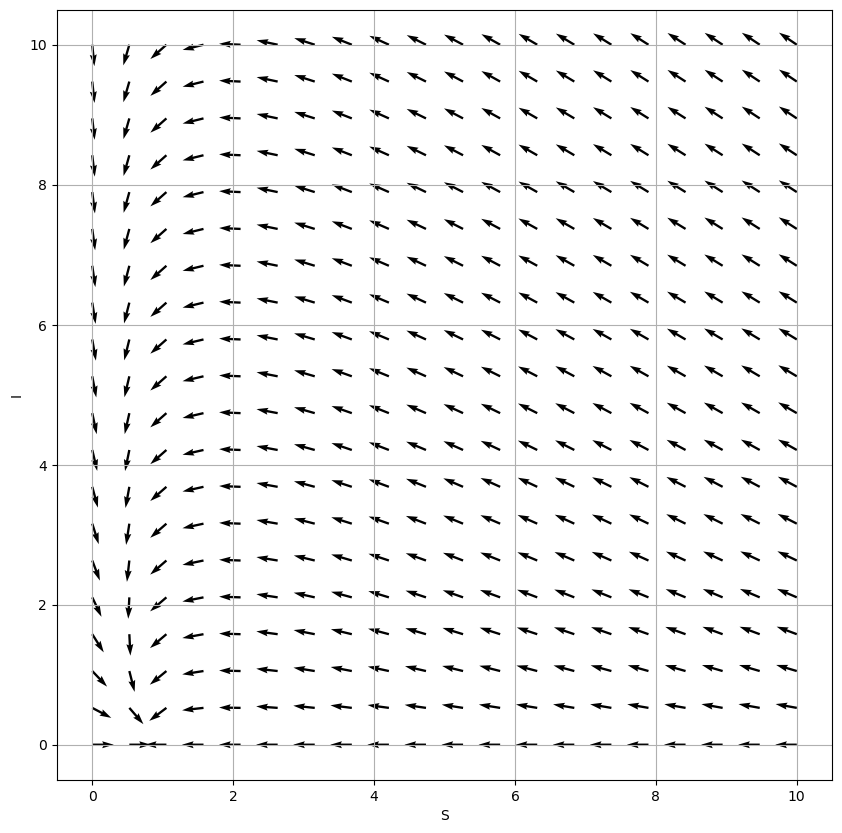

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters
mu = 1.0  # example value for mu
beta = 0.5  # example value for beta

# System of differential equations
def dS_dt(S, I):
    return mu * (1 - S) - beta * I * S

def dI_dt(S, I):
    return I * (beta * S - 1)

# Grid of points
S, I = np.meshgrid(np.linspace(0, 10, 20), np.linspace(0, 10, 20))

# Compute derivatives
dS = dS_dt(S, I)
dI = dI_dt(S, I)

norm = np.sqrt(dS ** 2 + dI ** 2)
dS = dS/norm
dI = dI/norm

# Plotting
plt.figure(figsize=(10, 10))
plt.quiver(S, I, dS, dI, color='k')
plt.xlabel('S')
plt.ylabel('I')
plt.grid(True)

plt.savefig('ex6.2.3.png')

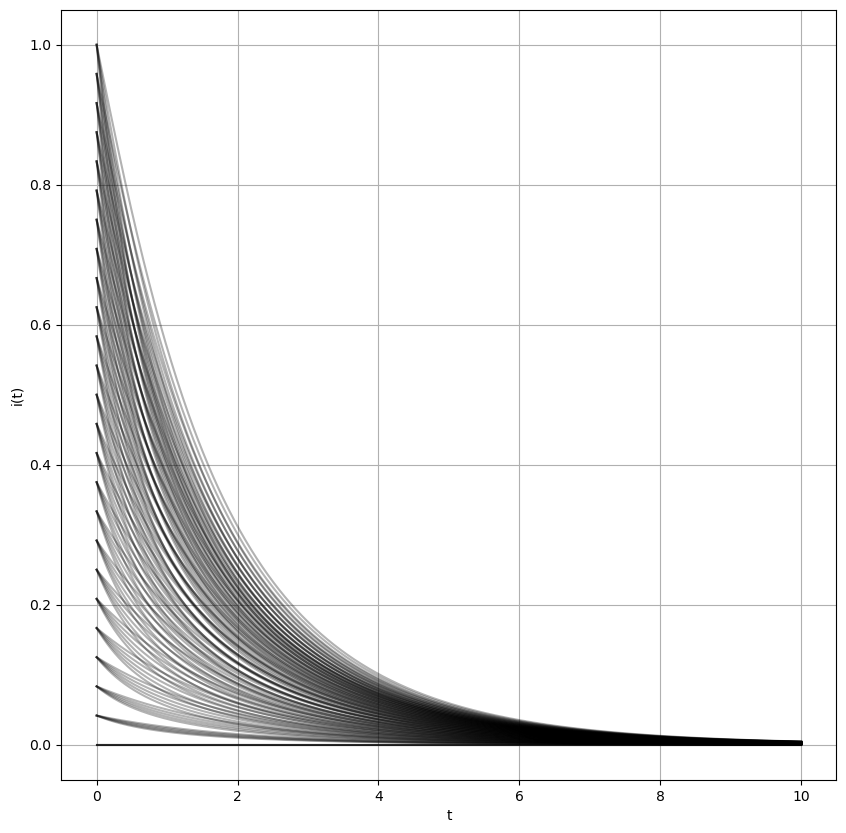

In [41]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the dynamical system equations
def dynamical_system(t, z, mu, b):
    s, i = z
    dsdt = mu * (1 - s) - b * i * s
    didt = i * (b * s - 1)
    return [dsdt, didt]

# Parameters
mu = 1.0  # Example value for mu, change as needed
b = 0.5   # Example value for b, change as needed

# Set up grid of initial conditions
s_values = np.linspace(0, 1, 5)
i_values = np.linspace(0, 1, 25)
S, I = np.meshgrid(s_values, i_values)
initial_conditions = np.vstack((S.flatten(), I.flatten())).T

# Solve the system of differential equations for each initial condition
t_eval = np.linspace(0, 10, 1000)
solutions = []
for initial_condition in initial_conditions:
    sol = solve_ivp(dynamical_system, [0, 10], initial_condition, args=(mu, b), t_eval=t_eval)
    solutions.append(sol.y)

# Plot I(t) for each initial condition
plt.figure(figsize=(10, 10))
for sol in solutions:
    plt.plot(t_eval, sol[1], color='k', alpha=0.3)
plt.xlabel('t')
plt.ylabel('i(t)')
plt.grid(True)

plt.savefig('ex6.2.3_1.png')
